# Exploration of Continental Terminal 3 and Kandi Data

Script written in Python3 between December 2021 - Januar 2022. 
The data used belongs to the Federal Institute for Geosciences and Natural Resources (BGR).
Badou H. Ayouba.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Continental Terminal 3 Data

Read and display summary statistic

In [2]:
###Read ct3 data
df=pd.read_excel('db_CT3_final.xlsx')


# Distance between pairs 

In [3]:
#Function to compute the distance between two point using Pythagore theorem
def Compute_dist(x1,x2,y1,y2):
    dist=np.sqrt(((x1-x2)**2)+(y1-y2)**2)
    return dist

# Analysing duplicates



In [4]:
#Extract Duplicates
dup=pd.DataFrame(columns=df.columns.values)
for n in range (1, len(df)):
    #print(n)
    if (df.at[n-1, 'X_utm']) == (df.at[n, 'X_utm']) and (df.at[n, 'X_utm']) != (df.at[n+1, 'X_utm']):   
        dup= dup.append(df.loc[n-1], verify_integrity=False, sort=False)
        dup= dup.append(df.loc[n], verify_integrity=False, sort=False)
    if (df.at[n-1, 'X_utm']) == (df.at[n, 'X_utm']) and (df.at[n, 'X_utm']) == (df.at[n+1, 'X_utm']):
        dup= dup.append(df.loc[n-1], verify_integrity=False, sort=False)
dup.to_excel('Duplicate.xlsx')

# Delete Duplicate

In [5]:
#Compute the distance between the wells
for n in range(1, len(df)):
    df.loc[n, 'Distance']=Compute_dist(df.loc[n-1, 'X_utm'], df.loc[n, 'X_utm'], df.loc[n-1, 'Y_utm'], df.loc[n, 'Y_utm'])

In [6]:

    df=df[df.Distance != 0]
    df=df.reset_index(drop=True)
    ###Computing the distance after dropping the duplicate
    for n in range(1, len(df)):
        df.loc[n, 'Distance']=Compute_dist(df.loc[n-1, 'X_utm'], df.loc[n, 'X_utm'], df.loc[n-1, 'Y_utm'], df.loc[n, 'Y_utm'])
df.head()

,field_1,ID_Sample,ID_Sample_,ID_puit_or,Site_AGES,Localite_1,A4_Village,Pays,Source_AGE,Projet,...,Date_prel,Instrum,Geo_mod,GeoMap_mod,Geo_Bore,SRTM_v3_30,X_utm,Y_utm,Piezo_AB,Distance
0,0,AGES 1 - Niger - G22,Niger - AGES 1 - Niger G22,G22,Chantier Kawara,Chantier kawara,NaN,Niger,AGES I (2010-2014),"AGES I, TC ABN/BGR (2010-2014)",...,16.03.2015,Pompe vergnet,CT3,CT3,NaN,227,543964.839,1358400.279,189.25,NaN
1,1,AGES 1 - Niger - G28,Niger - AGES 1 - Niger G28,G28,Kangna Kangna,Kangna Kangna,NaN,Niger,AGES I (2010-2014),"AGES I, TC ABN/BGR (2010-2014)",...,16.03.2015,bidon,CT3,CT3,NaN,204,553121.514,1334031.803,176.05,26032.044092
2,2,AGES 1 - Niger - G30,Niger - AGES 1 - Niger G30,G30,Tlembou,Tlembou,NaN,Niger,AGES I (2010-2014),"AGES I, TC ABN/BGR (2010-2014)",...,17.03.2015,bidon,CT3,CT3,NaN,204,536683.584,1337169.662,173.88,16734.745346
3,3,AGES 2 - Niger 01 - 12,Niger - AGES 2 - Niger A12,AGES2-Nig01-12,Yelou 1 (fe),Yelou,Yelou,Niger,AGES II (2015-2019),"AGES I, TC ABN/BGR (2010-2014)",...,12.12.2016,SubPompe,CT3,Alluvial,CT3,180,562638.222,1355093.480,176.40,31542.138250
4,4,AGES 2 - Niger 01 - 23,Niger - AGES 2 - Niger A23,AGES2-Nig01-23,Libo Guéna,Libo Guena,NaN,Niger,AGES II (2015-2019),"AGES I, TC ABN/BGR (2010-2014)",...,15.12.2016,Bailer,CT3,CT3,CT3,242,541193.741,1380051.828,181.05,32905.697079


# Visualisation of the original data 

In [7]:
df[['NS_m_calc','SRTM_v3_30','Piezo_AB','Distance']].describe()

,NS_m_calc,SRTM_v3_30,Piezo_AB,Distance
count,4851.000000,4851.000000,4851.000000,4850.000000
mean,34.140678,234.808699,200.668021,19952.768327
std,18.270118,23.371806,17.822616,26022.364405
min,-16.420000,162.000000,131.860000,1.106004
25%,19.810000,219.000000,189.425000,5488.824621
50%,32.500000,235.000000,198.100000,12761.996641
75%,47.400000,251.000000,210.700000,24485.189181
max,115.900000,318.000000,260.000000,338859.218148


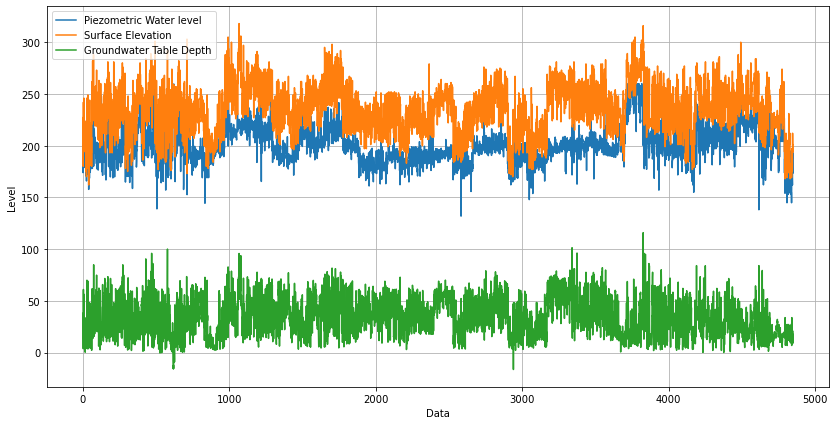

In [8]:
plt.figure(figsize=(14,7))
plt.plot(df['Piezo_AB'], label='Piezometric Water level')
plt.plot(df['SRTM_v3_30'], label='Surface Elevation')
plt.plot(df['NS_m_calc'], label='Groundwater Table Depth')
plt.legend(loc='upper left')
plt.xlabel('Data')
plt.ylabel('Level')
plt.grid(True)

   - GroundWater level is estimated by soustractring Aquifer Static level from the Elevation of the Soil Surface
   - The data show that when estimating the water level, the resulting values follow a trend in the direction of the Elevation
   - in the extrem West of the region of interest the Elevation of the Soil surface start to diverge sligthly from the global mean. The abrupt changes in the Elevation data is transposed into to the water level. 

# Histogram of the data

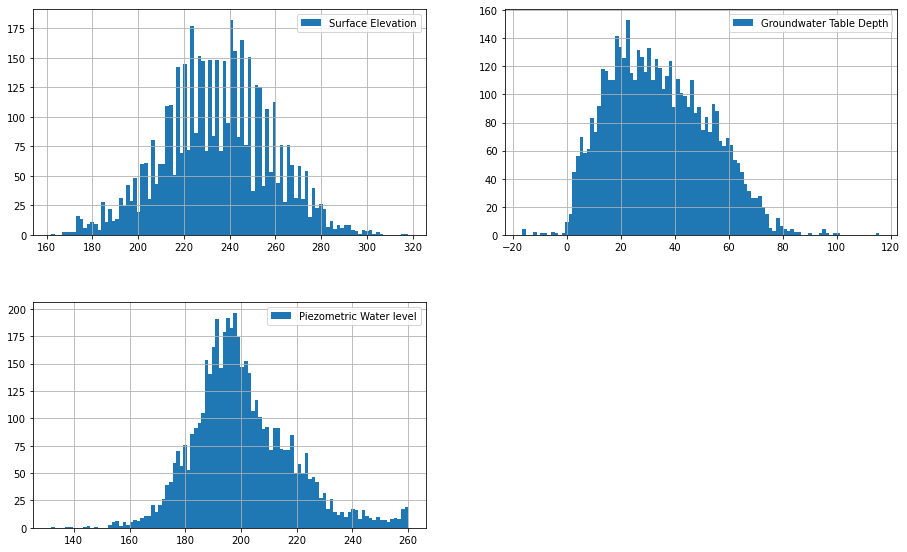

In [9]:
plt.subplot(221)
plt.grid(True)
plt.hist(df['SRTM_v3_30'], bins=100, label='Surface Elevation')
plt.legend(loc='upper right')
plt.subplot(222)
plt.grid(True)
plt.hist(df['NS_m_calc'], bins=100, label='Groundwater Table Depth')
plt.legend(loc='upper right')
plt.subplot(223)
plt.grid(True)
plt.hist(df['Piezo_AB'], bins=100, label='Piezometric Water level') # histogram of the distribution of observed points
plt.legend(loc='upper right')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.8, wspace=0.2, hspace=0.3)
plt.show()
#plt.subplot(224)

# Stationarity

1. Verification of Stationarity - Aquifer static level

In [10]:
#Global mean - Global variance - of Static level all data
global_mean2 = df['NS_m_calc'].mean()
global_var2 = df.var()['NS_m_calc']

In [11]:
#Local mean - Local variance - of Static level
#### Slice of the data into two equal subsets
y= len(df)/2
df1=df.loc[0:y]
df2=df.loc[y+1:y*2]
#### Estimate of local mean 
loc_mean1= df1['NS_m_calc'].mean()
loc_mean2=df2['NS_m_calc'].mean()
#### Estimate of local variance
loc_var1= df1.var()['NS_m_calc']
loc_var2= df2.var()['NS_m_calc']

Comparison - Local variation vs global_variation - Static Level

In [12]:
print('Global mean: ', global_mean2)
print('Global variance: ', global_var2)
print('local mean of the first subset:', loc_mean1)
print('local variance of the first subset : ', loc_var1)
print('local mean of the second subset: ', loc_mean2)
print('local variance of the second subset: ', loc_var2)

Global mean:  34.140678210678225
Global variance:  333.79720327189335
local mean of the first subset: 34.821648804616615
local variance of the first subset :  320.6381766617648
local mean of the second subset:  33.45012788778881
local variance of the second subset:  346.1040579696057


2. Verification of Strict Stationarity - Piezometric Water level - all of the data 

In [13]:
#Global mean - Global variance - of water level
global_mean = df['Piezo_AB'].mean()
global_var = df.var()['Piezo_AB']


In [14]:
#Local mean - Local variance - of water level
#### Slice of the data into two equal subsets
df1=df.loc[0:y]
df2=df.loc[y+1:y*2]
#### Estimate of local mean 
local_mean1= df1['Piezo_AB'].mean()
local_mean2=df2['Piezo_AB'].mean()
#### Estimate of local variance
local_variance1= df1.var()['Piezo_AB']
local_variance2= df2.var()['Piezo_AB']



Comparison - Local variation vs global variation - All data

In [15]:
print('Global mean of the data: ' , global_mean)
print('local mean of the first subset: ', local_mean1)
print('local mean of the second subset: ', local_mean2)
print('Global variance of the data: ', global_var)
print('local variance of the first subset: ', local_variance1)
print('local variance of the second subset: ', local_variance2)

Global mean of the data:  200.6680210265923
local mean of the first subset:  199.392283594394
local mean of the second subset:  201.9487995049507
Global variance of the data:  317.64565154677496
local variance of the first subset:  282.427315030469
local variance of the second subset:  349.84608213229956


3. Verification of Strict Stationarity after removing the area where the elevation start to diverge slighty from the mean

In [16]:
## Consider data where PWL <= 260
df_mask=df['Piezo_AB']<=260
outlier= df[df['Piezo_AB']>260]
outlier.to_excel('Outliers_CT3.xlsx')
new_data=df[df_mask]
new_data=new_data.reset_index(drop=True)
#new_data
##verify stationarity of the new dataset
glob_mean = new_data['Piezo_AB'].mean()
glob_var = new_data.var()['Piezo_AB']
#### Slice of the data into two equal subsets
b=len(new_data)/2
df3=new_data.loc[0:b]
df4=new_data.loc[b+1:b*2]
#### Estimate of local mean 
local_mean3= df3['Piezo_AB'].mean()
local_mean4=df4['Piezo_AB'].mean()
#### Estimate of local variance
local_var3= df3.var()['Piezo_AB']
local_var4= df4.var()['Piezo_AB']

Comparison - Local variation vs global variation - data without west divergence of elevation

In [17]:
print('Global mean of the data :', glob_mean ), print(b)
print('local mean of the first subset: ', local_mean3)
print('local mean of the second subset: ', local_mean4)
print('Global variance of the data: ', glob_var)
print('local variance of the first subset: ', local_var3)
print('local variance of the second subset: ', local_var4)

Global mean of the data : 200.6680210265923
2425.5
local mean of the first subset:  199.392283594394
local mean of the second subset:  201.9487995049507
Global variance of the data:  317.64565154677496
local variance of the first subset:  282.427315030469
local variance of the second subset:  349.84608213229956


Visualization of the new dataset

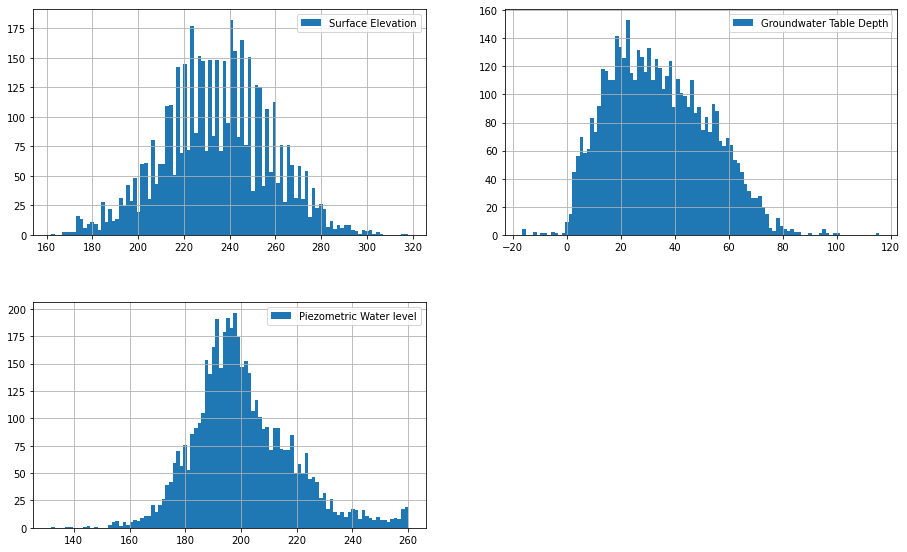

In [18]:
plt.subplot(221)
plt.grid(True)
plt.hist(new_data['SRTM_v3_30'], bins=100, label='Surface Elevation')
plt.legend(loc='upper right')
plt.subplot(222)
plt.grid(True)
plt.hist(new_data['NS_m_calc'], bins=100, label='Groundwater Table Depth')
plt.legend(loc='upper right')
plt.subplot(223)
plt.grid(True)
plt.hist(new_data['Piezo_AB'], bins=100, label='Piezometric Water level') # histogram of the distribution of observed points
plt.legend(loc='upper right')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.8, wspace=0.2, hspace=0.3)
plt.show()

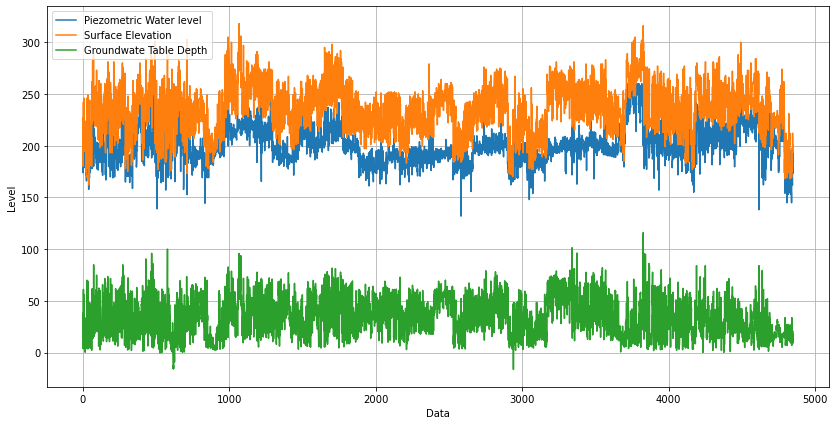

In [19]:
plt.figure(figsize=(14,7))
plt.plot(new_data['Piezo_AB'], label='Piezometric Water level')
plt.plot(new_data['SRTM_v3_30'], label='Surface Elevation')
plt.plot(new_data['NS_m_calc'], label='Groundwate Table Depth')
plt.legend(loc='upper left')
plt.xlabel('Data')
plt.ylabel('Level')
plt.grid(True)

# Experimental Variogram

In [20]:
#Compute square differences between tail and head return a dataframe
def square_diff(db, lag):
    vario=pd.DataFrame()
    for n in range (0, len(db)-lag):
        vario.loc[n, 'ID']=db.loc[n, 'ID_Sample']
        vario.loc[n, 'Zu']=db.loc[n+lag, 'Piezo_AB']
        vario.loc[n, 'Z']=db.loc[n, 'Piezo_AB']
        vario.loc[n, 'lag_dist']=Compute_dist(db.loc[n, 'X_utm'], db.loc[n+lag, 'X_utm'], db.loc[n, 'Y_utm'], db.loc[n+lag, 'Y_utm'])
    for n in range (0, len(vario)):    
        vario.loc[n, 'var']=((vario.loc[n, 'Z'] - vario.loc[n, 'Zu'])**2)
    return vario
    


In [21]:
#Compute gamma h - h:average distance between observations
#suite square_diff
def gamma_parameter(data):
    num=data['var'].count()
    sum_Pair=data['var'].sum()
    Gamma_h=(1/num)*sum_Pair*0.5
    lag_dist=data['lag_dist'].mean()
    x1=data['Z'].astype(float, errors = 'raise')
    x2=data['Zu'].astype(float, errors = 'raise')
    corr_coeff=x1.corr(x2,method ='pearson')
    return Gamma_h, lag_dist, corr_coeff

In [22]:
def variogram(dg, x):
    #Compute the variogram for specified number of lag  (x)
    varg=pd.DataFrame()
    for y in range(1, x+1):
        g=square_diff(dg, y)
        gam, dist, r =gamma_parameter(g)
        varg.loc[y, 'Gam_h']=gam
        varg.loc[y, 'Average_dist_pairs']=round(dist)
        varg.loc[y, 'Corr_Coeff']=r
    return varg      

In [23]:
def lag_dist_estimate(vario):
    #Estimate the Lag distance between pairs
    #the distance separating pairs location is not a constant - h vary from one pair to another
    #as the lag value increase, the lag distance will be the cumulative of average distance between pairs
    vario.loc[1, 'Lag_distance']=vario.loc[1, 'Average_dist_pairs']
    for g in range(2, len(vario)+1):
        vario.loc[g, 'Lag_distance']= vario.loc[g-1, 'Lag_distance'] + vario.loc[g, 'Average_dist_pairs']
    return vario
        

# Multivariate Distribution

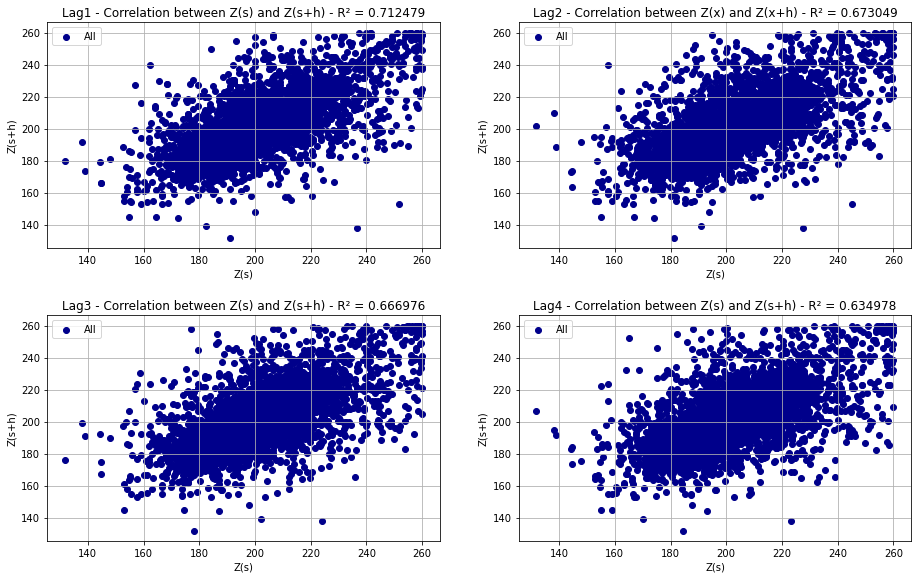

In [24]:
variox1=square_diff(new_data, 1)
#gamma, lagdist, corr1 = gamma_parameter(variox)
variox2=square_diff(new_data, 2)
#gamma, lagdist, corr2 = gamma_parameter(variox)
variox3=square_diff(new_data, 3)
#gamma, lagdist, corr3 = gamma_parameter(variox)
variox4=square_diff(new_data, 4)
#gamma, lagdist, corr4 = gamma_parameter(variox)
plt.subplot(221)
plt.scatter(variox1['Z'],variox1['Zu'], color = 'DarkBlue',label = 'All')
plt.xlabel('Z(s)')
plt.ylabel('Z(s+h)')
plt.title('Lag1 - Correlation between Z(s) and Z(s+h) - R² = 0.712479')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplot(222)
plt.scatter(variox2['Z'],variox2['Zu'],color = 'DarkBlue',label = 'All')
plt.xlabel('Z(s)')
plt.ylabel('Z(s+h)')
plt.title('Lag2 - Correlation between Z(x) and Z(x+h) - R² = 0.673049')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplot(223)
plt.scatter(variox3['Z'],variox3['Zu'],color = 'DarkBlue',label = 'All')
plt.xlabel('Z(s)')
plt.ylabel('Z(s+h)')
plt.title('Lag3 - Correlation between Z(s) and Z(s+h) - R² = 0.666976')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplot(224)
plt.scatter(variox4['Z'],variox4['Zu'],color = 'DarkBlue',label = 'All')
plt.xlabel('Z(s)')
plt.ylabel('Z(s+h)')
plt.title('Lag4 - Correlation between Z(s) and Z(s+h) - R² = 0.634978')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.8, wspace=0.2, hspace=0.3)
plt.show()

In [25]:
variox1

,ID,Zu,Z,lag_dist,var
0,AGES 1 - Niger - G22,176.05,189.25,26032.044092,174.2400
1,AGES 1 - Niger - G28,173.88,176.05,16734.745346,4.7089
2,AGES 1 - Niger - G30,176.40,173.88,31542.138250,6.3504
3,AGES 2 - Niger 01 - 12,181.05,176.40,32905.697079,21.6225
4,AGES 2 - Niger 01 - 23,188.29,181.05,46492.181691,52.4176
...,...,...,...,...,...
4845,SFN Benin (2019) - 1386,161.89,164.53,468.294135,6.9696
4846,SFN Benin (2019) - 1387,194.00,161.89,25151.538634,1031.0521
4847,SFN Benin (2019) - 1388,188.44,194.00,3128.352050,30.9136
4848,SFN Benin (2019) - 1389,192.00,188.44,3006.817386,12.6736


# Distribution of the Distance between Pairs

Visualisation of the distribution of pair distance / First Four Lag 

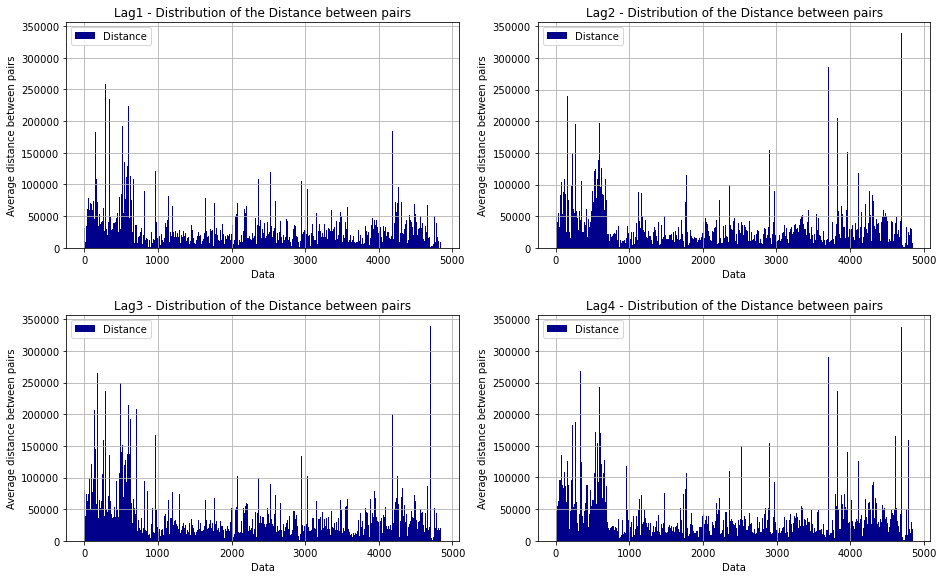

In [26]:
### Bar chart of the distribution of the distance
plt.subplot(221)
plt.bar(variox1.index.values, variox1['lag_dist'], align='center', width=3, color = 'DarkBlue',label = 'Distance')
plt.xlabel('Data')
plt.ylabel('Average distance between pairs')
plt.title('Lag1 - Distribution of the Distance between pairs')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplot(222)
plt.bar(variox2.index.values, variox2['lag_dist'], align='center', width=3, color = 'DarkBlue',label = 'Distance')
plt.xlabel('Data')
plt.ylabel('Average distance between pairs')
plt.title('Lag2 - Distribution of the Distance between pairs')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplot(223)
plt.bar(variox3.index.values, variox3['lag_dist'], align='center', width=3, color = 'DarkBlue',label = 'Distance')
plt.xlabel('Data')
plt.ylabel('Average distance between pairs')
plt.title('Lag3 - Distribution of the Distance between pairs')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplot(224)
plt.bar(variox4.index.values, variox4['lag_dist'], align='center', width=3, color = 'DarkBlue',label = 'Distance')
plt.xlabel('Data')
plt.ylabel('Average distance between pairs')
plt.title('Lag4 - Distribution of the Distance between pairs')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.8, wspace=0.2, hspace=0.3)
plt.show()

Distance between pairs are in general under 100 km. The average tendency does not change as the lag number increase. As first assumption, the average of the distance between pairs has been considered for the lag size.
Most of the software that perform variogram calculation search for pairs located in a given distance. But as the sample locations are not separate by an exact distance in the field, the sample data usely do not have equal separation distance. Choosing the lag distance that allows to consider all pairs in the field is not straighforward. if the lag distance is too short only the data in the immediate vacinity are paired. In other hand, if the lag distance is too large many interested pairs correlation between pairs may not be signficant.
The following experimental variogram has been computed based on each possible pair that can be formed from the database. Instead of assigning a given separation distance, data are paired following a continuity in the X-axis in the direction     East --> West. Then the distance separating the pair is calculated. The bar charts above show distribution of the distance of the pairs. The resulting lag distance (size), in first assumption, is assumed to be the average of the distance of the given pairs.

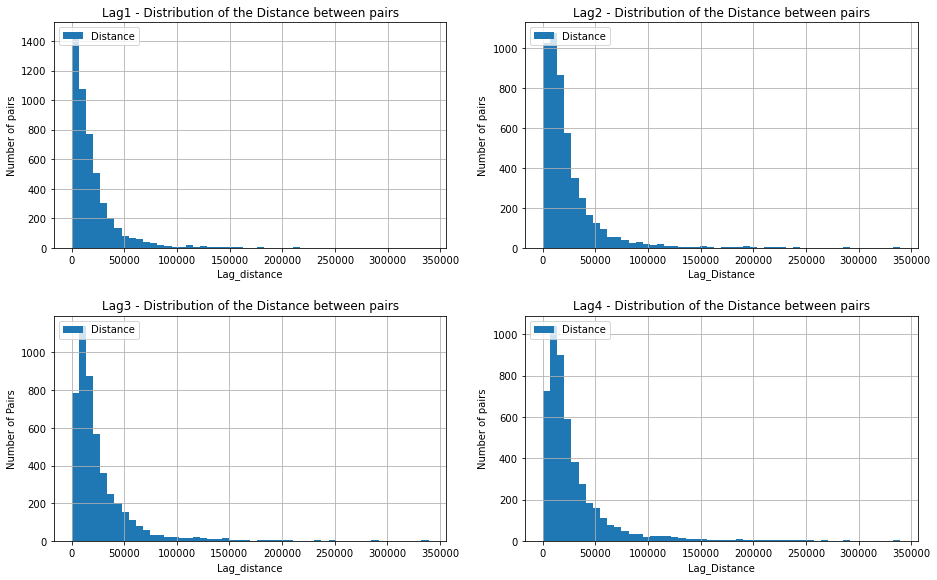

In [27]:
##Histogram of the distance distribution
plt.subplot(221)
plt.hist(variox1['lag_dist'], bins=50 ,label = 'Distance')
plt.xlabel('Lag_distance')
plt.ylabel('Number of pairs')
plt.title('Lag1 - Distribution of the Distance between pairs')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplot(222)
plt.hist(variox2['lag_dist'], bins=50 ,label = 'Distance')
plt.xlabel('Lag_Distance')
plt.ylabel('Number of pairs')
plt.title('Lag2 - Distribution of the Distance between pairs')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplot(223)
plt.hist(variox3['lag_dist'], bins=50 ,label = 'Distance')
plt.xlabel('Lag_distance')
plt.ylabel('Number of Pairs')
plt.title('Lag3 - Distribution of the Distance between pairs')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplot(224)
plt.hist(variox4['lag_dist'], bins=50 ,label = 'Distance')
plt.xlabel('Lag_Distance')
plt.ylabel('Number of pairs')
plt.title('Lag4 - Distribution of the Distance between pairs')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.8, wspace=0.2, hspace=0.3)
plt.show()

In [28]:
variox1['lag_dist'].describe()
variox1

,ID,Zu,Z,lag_dist,var
0,AGES 1 - Niger - G22,176.05,189.25,26032.044092,174.2400
1,AGES 1 - Niger - G28,173.88,176.05,16734.745346,4.7089
2,AGES 1 - Niger - G30,176.40,173.88,31542.138250,6.3504
3,AGES 2 - Niger 01 - 12,181.05,176.40,32905.697079,21.6225
4,AGES 2 - Niger 01 - 23,188.29,181.05,46492.181691,52.4176
...,...,...,...,...,...
4845,SFN Benin (2019) - 1386,161.89,164.53,468.294135,6.9696
4846,SFN Benin (2019) - 1387,194.00,161.89,25151.538634,1031.0521
4847,SFN Benin (2019) - 1388,188.44,194.00,3128.352050,30.9136
4848,SFN Benin (2019) - 1389,192.00,188.44,3006.817386,12.6736


In [29]:
variox4['lag_dist'].describe()

count      4847.000000
mean      28899.870282
std       34895.840217
min           0.000000
25%        9953.624725
50%       18089.017591
75%       33850.924680
max      339109.054965
Name: lag_dist, dtype: float64

In [30]:
variox1=square_diff(new_data, 200)

In [31]:
variox1['lag_dist'].describe()

count      4651.000000
mean     101668.477513
std       71431.839272
min         639.697590
25%       46098.576852
50%       85097.206823
75%      141116.898674
max      415439.221632
Name: lag_dist, dtype: float64

In [32]:
#Copy new dataset to excel
new_data.to_excel('CT3_final.xlsx')


In [33]:
va=variogram(new_data, 30)
va_dis=lag_dist_estimate(va)
va_dis

,Gam_h,Average_dist_pairs,Corr_Coeff,Lag_distance
1,93.861918,19953.0,0.704425,19953.0
2,107.367523,24085.0,0.661890,44038.0
3,108.931441,26781.0,0.656939,70819.0
4,117.103441,28900.0,0.631203,99719.0
5,121.051250,30763.0,0.618614,130482.0
6,124.557914,32315.0,0.607461,162797.0
7,128.233487,33928.0,0.595831,196725.0
8,130.673093,35158.0,0.588118,231883.0
9,139.067376,36491.0,0.561514,268374.0
10,140.698610,38020.0,0.556268,306394.0


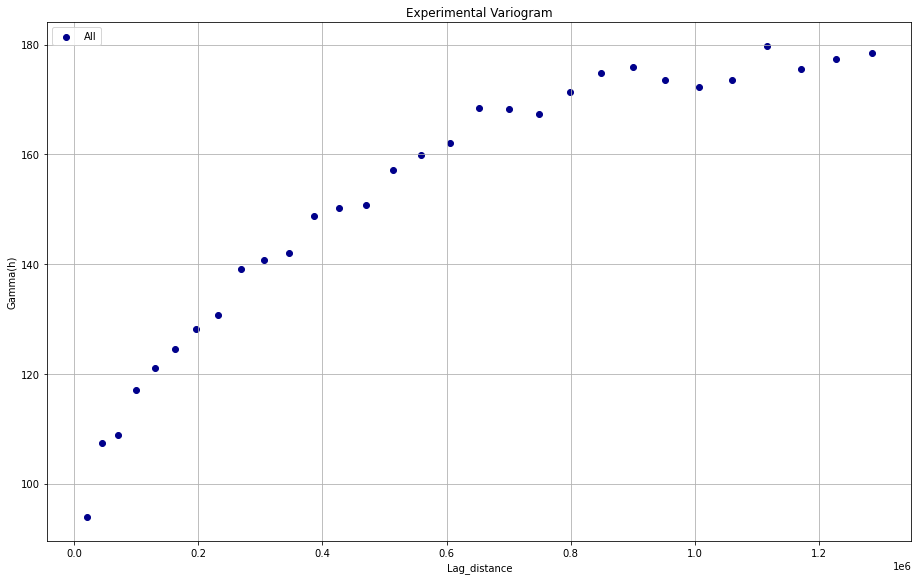

In [34]:
plt.scatter(va_dis['Lag_distance'],va_dis['Gam_h'], color = 'DarkBlue',label = 'All')
plt.xlabel('Lag_distance')
plt.ylabel('Gamma(h)')
plt.title('Experimental Variogram')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.8, wspace=0.2, hspace=0.3)
plt.show()
#va.plot.scatter(x='Lag_dist', y='Gam_h', c='DarkBlue')

# Kandi Data

In [34]:
###Read kandi data
kandi=pd.read_excel('DB_Kandi.xlsx')

# Analysing duplicates

In [35]:
#Extract Duplicates
dup_k=pd.DataFrame(columns=kandi.columns.values)
for n in range (1, len(kandi)):
    #print(n)
    if (kandi.at[n-1, 'X_utm']) == (kandi.at[n, 'X_utm']) and (kandi.at[n, 'X_utm']) != (kandi.at[n+1, 'X_utm']):   
        dup_k= dup_k.append(kandi.loc[n-1], verify_integrity=False, sort=False)
        dup= dup_k.append(kandi.loc[n], verify_integrity=False, sort=False)
    if (kandi.at[n-1, 'X_utm']) == (kandi.at[n, 'X_utm']) and (kandi.at[n, 'X_utm']) == (kandi.at[n+1, 'X_utm']):
        dup_k= dup_k.append(df.loc[n-1], verify_integrity=False, sort=False)
#Save duplicate in external Excel file
dup_k.to_excel('Duplicate_Kandi.xlsx') 

In [36]:
##Delete Duplicate
#Compute the distance between the wells
for n in range(1, len(kandi)):
    kandi.loc[n, 'Distance']=Compute_dist(kandi.loc[n-1, 'X_utm'], kandi.loc[n, 'X_utm'], kandi.loc[n-1, 'Y_utm'], kandi.loc[n, 'Y_utm'])

kandi=kandi[kandi.Distance != 0]
kandi=kandi.reset_index(drop=True)
###Computing the distance after dropping the duplicate
###While the distance of the first observation can not be computed. It value is determined through the nugget.
for n in range(1, len(kandi)):
    kandi.loc[n, 'Distance']=Compute_dist(kandi.loc[n-1, 'X_utm'], kandi.loc[n, 'X_utm'], kandi.loc[n-1, 'Y_utm'], kandi.loc[n, 'Y_utm'])

# Stationarity

Visualisation of the original data

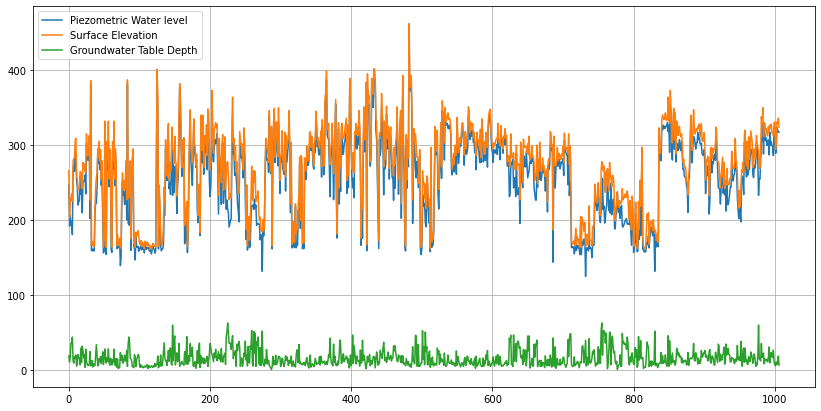

In [37]:
plt.figure(figsize=(14,7))
plt.plot(kandi['Piezo_AB'], label='Piezometric Water level')
plt.plot(kandi['SRTM_v3_30'], label='Surface Elevation')
plt.plot(kandi['NS_m_calc'], label='Groundwater Table Depth')
plt.legend(loc='upper left')
plt.grid(True)

# Histogram Data Distribution

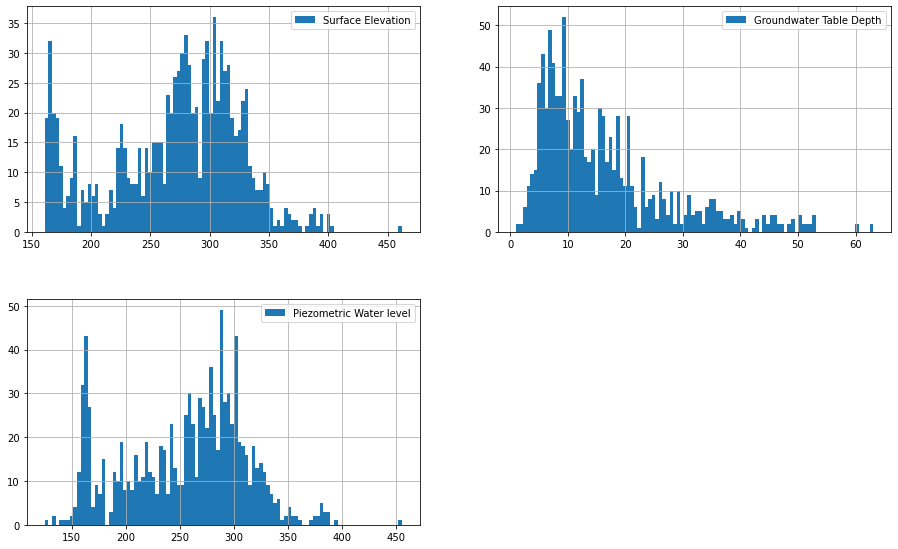

In [38]:
plt.subplot(221)
plt.grid(True)
plt.hist(kandi['SRTM_v3_30'], bins=100, label='Surface Elevation')
plt.legend(loc='upper right')
plt.subplot(222)
plt.grid(True)
plt.hist(kandi['NS_m_calc'], bins=100, label='Groundwater Table Depth')
plt.legend(loc='upper right')
plt.subplot(223)
plt.grid(True)
plt.hist(kandi['Piezo_AB'], bins=100, label='Piezometric Water level') # histogram of the distribution of observed points
plt.legend(loc='upper right')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.8, wspace=0.2, hspace=0.3)
plt.show()
#plt.subplot(224)

Neither Surface Elevation (SE) data, Groundwater Table Depth(WTD), or Piezometric Water level data (PWL) follow a normal distribution. Data transformation may be necessary

# Verify Stationarity 

1. Verification of Stationarity - Groundwater Table Depth

In [39]:
#Global mean - Global variance - of Static level all data
g_mean = kandi['NS_m_calc'].mean()
g_var = kandi.var()['NS_m_calc']

#Local mean - Local variance - of Static level
#### Slice of the data into two equal subsets
x= len(kandi)/2
sub1=kandi.loc[0:x]
sub2=kandi.loc[x+1:x*2]
#### Estimate of local mean 
lo_mean1= sub1['NS_m_calc'].mean()
lo_mean2= sub2['NS_m_calc'].mean()
#### Estimate of local variance
lo_var1= sub1.var()['NS_m_calc']
lo_var2= sub2.var()['NS_m_calc']


Comparison - Local variation vs global_variation - WTD

In [40]:
print('Global mean: ', g_mean)
print('Global variance: ', g_var)
print('local mean of the first subset:', lo_mean1)
print('local variance of the first subset : ', lo_var1)
print('local mean of the second subset: ', lo_mean2)
print('local variance of the second subset: ', lo_var2)

Global mean:  16.203386295928524
Global variance:  127.06242957527922
local mean of the first subset: 15.90170634920635
local variance of the first subset :  121.83332710246466
local mean of the second subset:  16.523764940239058
local variance of the second subset:  132.47125106639314


Verification of Strict Stationarity - Piezometric Water level - all of the data

In [41]:
#Global mean - Global variance - of water level
gl_mean = kandi['Piezo_AB'].mean()
gl_var = kandi.var()['Piezo_AB']

#Local mean - Local variance - of water level
#### Slice of the data into two equal subsets
sub3=kandi.loc[0:x]
sub4=kandi.loc[x+1:x*2]
#### Estimate of local mean 
loca_mean1= sub3['Piezo_AB'].mean()
loca_mean2= sub4['Piezo_AB'].mean()
#### Estimate of local variance
loca_variance1= sub3.var()['Piezo_AB']
loca_variance2= sub4.var()['Piezo_AB']

In [42]:
print('Global mean of the data: ' , gl_mean)
print('local mean of the first subset: ', loca_mean1)
print('local mean of the second subset: ', loca_mean2)
print('Global variance of the data: ', gl_var)
print('local variance of the first subset: ', loca_variance1)
print('local variance of the second subset: ', loca_variance2)

Global mean of the data:  255.3020754716979
local mean of the first subset:  253.8760714285714
local mean of the second subset:  256.8009362549801
Global variance of the data:  3114.5989973779956
local variance of the first subset:  3615.8226887105907
local variance of the second subset:  2617.2413929340523


# Statistic description Kandi dataset

In [43]:
#data[['column1', 'column2', 'column3']].describe()
kandi[['NS_m_calc','SRTM_v3_30','Piezo_AB']].describe()

,NS_m_calc,SRTM_v3_30,Piezo_AB
count,1007.000000,1007.000000,1007.000000
mean,16.203386,271.505462,255.302075
std,11.272197,54.899997,55.808593
min,1.000000,161.000000,125.120000
25%,7.960000,236.500000,212.960000
50%,12.620000,280.000000,267.210000
75%,20.415000,310.500000,295.550000
max,63.050000,462.000000,455.300000


# Experiment Variogram

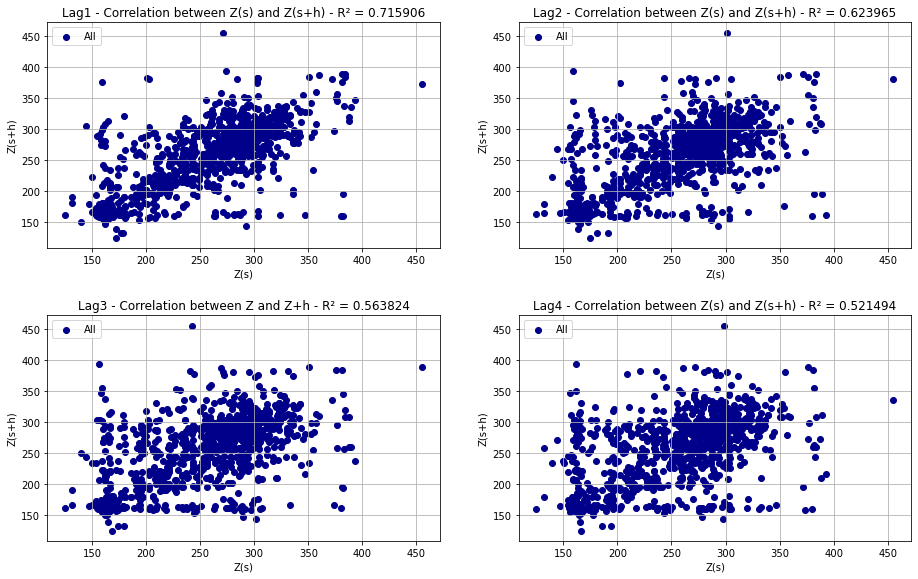

In [44]:
vario1=square_diff(kandi, 1)
#gamma, lagdist, corr1 = gamma_parameter(variox)
vario2=square_diff(kandi, 2)
#gamma, lagdist, corr2 = gamma_parameter(variox)
vario3=square_diff(kandi, 3)
#gamma, lagdist, corr3 = gamma_parameter(variox)
vario4=square_diff(kandi, 4)
#gamma, lagdist, corr4 = gamma_parameter(variox)
plt.subplot(221)
plt.scatter(vario1['Z'],vario1['Zu'], color = 'DarkBlue',label = 'All')
plt.xlabel('Z(s)')
plt.ylabel('Z(s+h)')
plt.title('Lag1 - Correlation between Z(s) and Z(s+h) - R² = 0.715906')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplot(222)
plt.scatter(vario2['Z'],vario2['Zu'],color = 'DarkBlue',label = 'All')
plt.xlabel('Z(s)')
plt.ylabel('Z(s+h)')
plt.title('Lag2 - Correlation between Z(s) and Z(s+h) - R² = 0.623965')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplot(223)
plt.scatter(vario3['Z'],vario3['Zu'],color = 'DarkBlue',label = 'All')
plt.xlabel('Z(s)')
plt.ylabel('Z(s+h)')
plt.title('Lag3 - Correlation between Z and Z+h - R² = 0.563824')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplot(224)
plt.scatter(vario4['Z'],vario4['Zu'],color = 'DarkBlue',label = 'All')
plt.xlabel('Z(s)')
plt.ylabel('Z(s+h)')
plt.title('Lag4 - Correlation between Z(s) and Z(s+h) - R² = 0.521494')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.8, wspace=0.2, hspace=0.3)
plt.show()

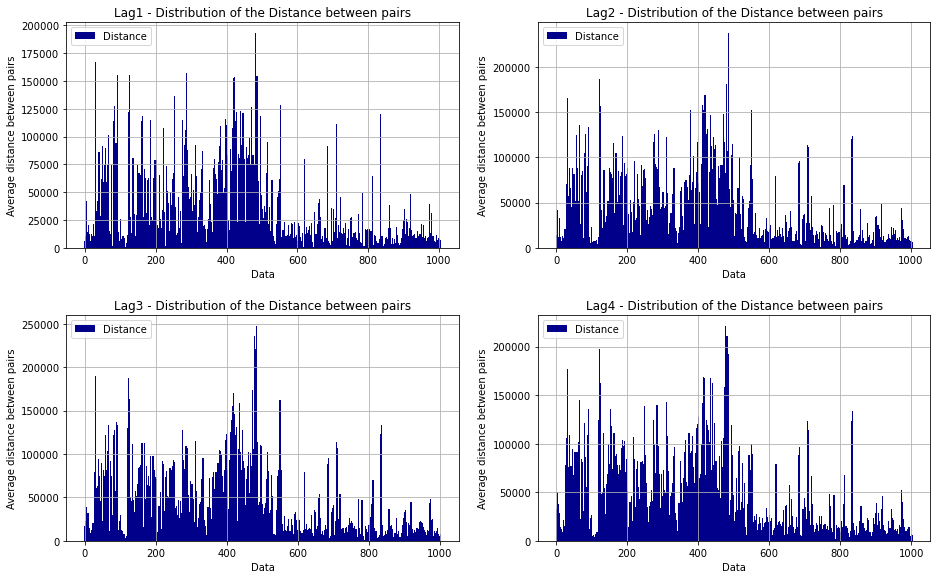

In [45]:
plt.subplot(221)
plt.bar(vario1.index.values, vario1['lag_dist'], align='center', width=3, color = 'DarkBlue',label = 'Distance')
plt.xlabel('Data')
plt.ylabel('Average distance between pairs')
plt.title('Lag1 - Distribution of the Distance between pairs')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplot(222)
plt.bar(vario2.index.values, vario2['lag_dist'], align='center', width=3, color = 'DarkBlue',label = 'Distance')
plt.xlabel('Data')
plt.ylabel('Average distance between pairs')
plt.title('Lag2 - Distribution of the Distance between pairs')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplot(223)
plt.bar(vario3.index.values, vario3['lag_dist'], align='center', width=3, color = 'DarkBlue',label = 'Distance')
plt.xlabel('Data')
plt.ylabel('Average distance between pairs')
plt.title('Lag3 - Distribution of the Distance between pairs')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplot(224)
plt.bar(vario4.index.values, vario4['lag_dist'], align='center', width=3, color = 'DarkBlue',label = 'Distance')
plt.xlabel('Data')
plt.ylabel('Average distance between pairs')
plt.title('Lag4 - Distribution of the Distance between pairs')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.8, wspace=0.2, hspace=0.3)
plt.show()

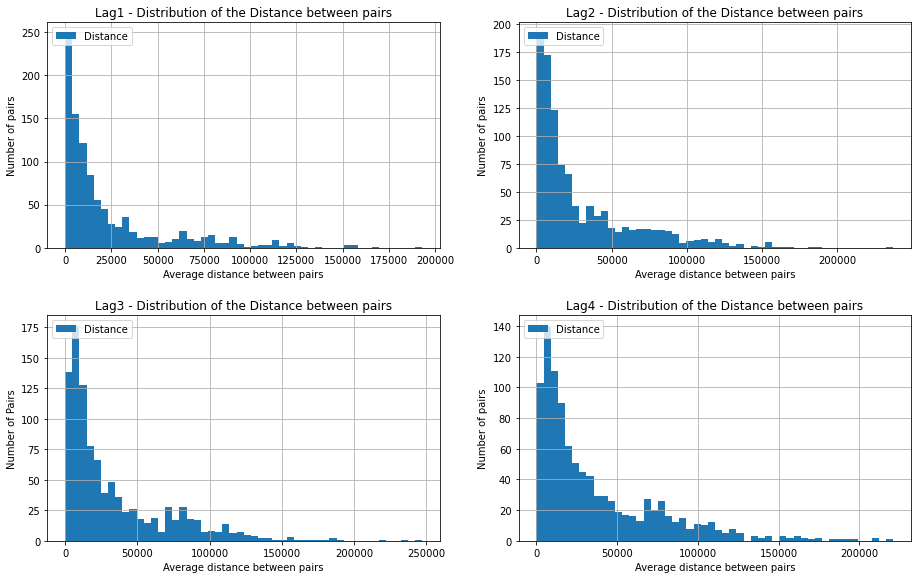

In [46]:
plt.subplot(221)
plt.hist(vario1['lag_dist'], bins=50 ,label = 'Distance')
plt.xlabel('Average distance between pairs')
plt.ylabel('Number of pairs')
plt.title('Lag1 - Distribution of the Distance between pairs')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplot(222)
plt.hist(vario2['lag_dist'], bins=50 ,label = 'Distance')
plt.xlabel('Average distance between pairs')
plt.ylabel('Number of pairs')
plt.title('Lag2 - Distribution of the Distance between pairs')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplot(223)
plt.hist(vario3['lag_dist'], bins=50 ,label = 'Distance')
plt.xlabel('Average distance between pairs')
plt.ylabel('Number of Pairs')
plt.title('Lag3 - Distribution of the Distance between pairs')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplot(224)
plt.hist(vario4['lag_dist'], bins=50 ,label = 'Distance')
plt.xlabel('Average distance between pairs')
plt.ylabel('Number of pairs')
plt.title('Lag4 - Distribution of the Distance between pairs')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.8, wspace=0.2, hspace=0.3)
plt.show()

In [47]:
#Copy dataset to excel
kandi.to_excel('Kandi_final.xlsx')

In [48]:
var=variogram(kandi, 30)
var_dis=lag_dist_estimate(var)
var_dis

,Gam_h,Average_dist_pairs,Corr_Coeff,Lag_distance
1,884.292726,23277.0,0.715906,23277.0
2,1170.186323,30006.0,0.623965,53283.0
3,1357.262414,34057.0,0.563824,87340.0
4,1488.494890,36844.0,0.521494,124184.0
5,1692.344791,39777.0,0.456119,163961.0
6,1783.588884,41803.0,0.426763,205764.0
7,1889.234429,44193.0,0.392957,249957.0
8,1827.970338,44809.0,0.412828,294766.0
9,1899.992070,46787.0,0.390202,341553.0
10,1896.810239,46888.0,0.391537,388441.0


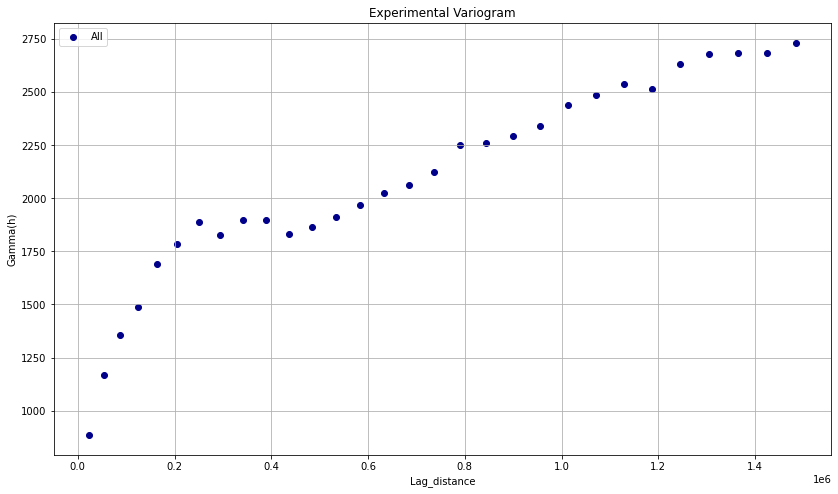

In [49]:
plt.scatter(var['Lag_distance'],var['Gam_h'], color = 'DarkBlue',label = 'All')
plt.xlabel('Lag_distance')
plt.ylabel('Gamma(h)')
plt.title('Experimental Variogram')
plt.legend(loc='upper left')
plt.grid(True)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=1.5, wspace=0.2, hspace=0.3)
plt.show()
#var.plot.scatter(x='Lag_dist', y='Gam_h', c='DarkBlue')